<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Cojoden
</div>

<div style="display: flex; background-color: blue;" >

# 0. Référentiel : Développer la gestion des données analytiques d’un projet d’application
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 0.1. Rapport
</div>

- La documentation des sources de données identifiées nécessaires au projet, en fonction des résultats de l’analyse exploratoire.
- Les visualisations synthétisant les caractéristiques du ou des jeux de données.
- Le script de nettoyage des données.
- Les éléments de modélisation des données - schémas, requêtes, etc.
- La procédure de mise en place du système de gestion de base de données analytique.
- Le script d’insertion des données dans le système de gestion de base de données.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 0.2. Soutenance
</div>

- Développer la gestion des données analytiques d’un projet d’application
- La documentation des sources de données identifiées nécessaires au projet, en fonction des résultats de l’analyse exploratoire.
- Les visualisations synthétisant les caractéristiques du ou des jeux de données - screenshot ou via un applicatif.
- La stratégie de nettoyage des données.
- Les éléments de modélisation des données - schémas, requêtes, etc.
- La justification du ou des systèmes de gestion de bases de données analytique adaptés à la modélisation des données.
- La procédure de mise en place du système de gestion de base de données analytique.

<div style="display: flex; background-color: Green; padding: 7px;" >

### 0.3. Démonstration
</div>

La démonstration doit présenter les éléments suivant :
- Le nettoyage des données.
- L’insertion des données dans le système de gestion de base de données

<div style="display: flex; background-color: blue;" >

# 1.La mission
</div>

La Coopérative des Joyeux Denisoviens, la CoJoDen, une agence de voyages engagée vient de vous embaucher pour créer un prototype informatique.

La CoJoDen a pour objectif d'étoffer son offre et monter en gamme en proposant à ses clients des séjours culturels thématiques. Ces séjours seront définis dynamiquement en fonction des souhaits du client.

Par exemple notre nouvelle cliente italienne Mme Gherardini souhaite organiser un petit périple pour découvrir les oeuvres de Gaston Chaissac. Elle ne dispose que d'un weekend et voudrait limiter ses déplacements à deux musées. Si vous regardez dans https://www.pop.culture.gouv.fr/ et vous faites une recherche sur Gaston Chaissac (plusieurs auteurs avec des casses différentes), vous trouverez des oeuvres principalement sur Nantes et Colmar. Vous pourrez proposer un séjour à cette dame en lui indiquant le temps estimé pour aller d'un lieu à l'autre (à vous de trouver un moyen de récupérer le temps de trajet, ce denier point est optionnel dans un premier temps).

A partir d'un extrait la base de donnée Joconde accessible au grand public, vous modéliserez une base de données relationnelle MySQL qui regroupera les informations que vous jugerez nécessaires.

Vous peuplerez la base avec les oeuvres disponibles en nettoyant et en homogénéisant au maximum les infos.
Vous créerez un code python qui servira de démonstrateur sur quelques exemples simples.

### Livrables

- Faites un démonstrateur python de faisabilité avec quelques références (stockage et accès aux
données)
- Au niveau des livrables, voici ce qu'il faudra: Script python du démonstrateur, pdf de modèle de base (PAS DE NOTEBOOK)
Si on a le temps cette semaine vous ferez une présentation de 10 min de votre programme.
Si c'est trop court pour vous, on fera ça lors de notre prochaine semaine de formation

- NoSQL pour la sauvegarde des PDF et images

### Ressources

- https://www.data.gouv.fr/fr/datasets/collections-des-musees-de-france-base-joconde/


Nomenclature des champs :
Ce jeu de données comprend l’intégralité du catalogue collectif des musées de France. Les notices d’objets des musées de France sont de toute nature (archéologie, beaux-arts, ethnologie…).
Le détail de la nomenclature de la liste des champs de la base Joconde est téléchargeable ci-dessous, voir "Pièce jointe".

<div style="display: flex; background-color: blue;" >

# 2.Exploration des données
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Chargement des données
</div>

In [1]:
from os import getcwd
from os.path import join
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import csv
import re
import cojoden_nettoyage as cojonet
from IPython.core.display import HTML
from cojoden_functions import color_graph_background, get_na_columns_classement, convert_string_to_search_string, convert_df_string_to_search_string
from collections import Counter

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = 0

# Récupère le répertoire du programme
file_path = getcwd() + "\\"
data_set_path = file_path + "dataset\\"

data_set_file_name = "base-joconde-extrait.csv"

print(f"Current execution path : {file_path}")
print(f"Dataset path : {data_set_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cojoden_avance\
Dataset path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cojoden_avance\dataset\


In [3]:
# Chargement et nettoyage général
df_origin = cojonet.load_data(data_set_path=data_set_path,data_set_file_name=data_set_file_name, verbose=verbose)
display(HTML(df_origin.head().to_html()))

(650853, 27) données chargées ------> ['ref', 'pop_coordonnees', 'autr', 'bibl', 'comm', 'deno', 'desc', 'dims', 'domn', 'dpt', 'ecol', 'hist', 'lieux', 'loca', 'loca2', 'mill', 'museo', 'nomoff', 'paut', 'peri', 'pins', 'prep', 'region', 'repr', 'tech', 'titr', 'ville_']


,ref,pop_coordonnees,auteur,bibl,commentaires,type_oeuvre,description,dimensions,domaine,geo_departement,geo_ecole_pays,hist,creation_lieux,lieux_conservation,geo_pays_region_ville,creation_millesime,museo,nom_officiel_musee,auteur_precisions,creation_periode,inscription_precisions,sujet_precisions,geo_region,sujet,materiaux_technique,titre,geo_ville
0,M0435002007,"49.112285,2.21638",LE GULUCHE Joseph Marie,33 ; 196 ; 44,NaN,statuette,"Terre cuite d'édition ; terre cuite, naturel","l. 30 cm ; H. 65 cm ; P. 22 cm ; VOLUM. 0,0429",sculpture,Val-d'Oise,France,"voir aussi : 2010.0.4, 2010.0.87 En Détresse",France;Ile-de-France;Val d'Oise;L'Isle-Adam (lieu de création),L'Isle-Adam;musée Louis Senlecq,NaN,1890 entre;1908 et,M0435,musée d'Art et d'Histoire Louis Senlecq,"Plourivo, 1849; Villejuif, 1915",4e quart 19e siècle;1er quart 20e siècle,Signé sur la terrasse au revers de la pièce : J. Le Guluche ; Cachet : Alphonse Hanne n°92 ; Inscription à l'avant de la pièce : En Détresse,groupe de deux pêcheurs et un enfant en détresse à la proue d'une embarcation en difficulté,Ile-de-France,"scène (naufrage, tempête, vague, bateau, marin pêcheur, homme, enfant, peur)",terre cuite,En Détresse,L'Isle-Adam
1,M0435001924,"49.112285,2.21638",THOMSEN Constant,NaN,NaN,buste,"terre cuite, naturel","l. 30 CM ; H. 62 CM ; P. 23 CM ; VOLUM. 0,0428",sculpture,Val-d'Oise,Danemark,voir aussi : n° 2010.0.25 Buste de Renet Tener,NaN,L'Isle-Adam;musée Louis Senlecq,NaN,NaN,M0435,musée d'Art et d'Histoire Louis Senlecq,"né en 1860 ; mort en 1921, actif vers 1893",4e quart 19e siècle;1er quart 20e siècle,"Signé au revers de la pièce sur l'épaule droite : C. Thomsen ; Cachet au revers de la pièce : Union Artistique de la Sculpture Française, et en dessous cachet rectangulaire : 8016 LE MFI PARIS ; Inscription à l'avant de la pièce : BAZEILLES","le titre : Bazeilles, fait peut-être un rappel de l'épisode de la guerre de 1870 : la bataille à Bazeilles",Ile-de-France,"portrait (homme, en buste, expression du visage, douleur)",terre cuite,Bazeilles,L'Isle-Adam
2,M0435002028,"49.112285,2.21638",FJERDINGSTAD Christian (orfèvre),NaN,NaN,vase,Vase ovoïde sur talon en étain,"H. 16,4 cm",orfèvrerie,Val-d'Oise,Danemark,"voir aussi : 2010.5.1, 2010.5.2, 2010.5.3, 2010.5.4, 2010.5.5",France;Ile-de-France;Val d'Oise;L'Isle-Adam (lieu de création),L'Isle-Adam;musée Louis Senlecq,NaN,1920 entre;1930 et,M0435,musée d'Art et d'Histoire Louis Senlecq,"né en 1891 ; mort en 1968 ; Christian Fjerginstad avait son atelier d'orfèvrerie à L'Isle-Adam de 1921 à 1960, 19 rue Martel, il travailla pour Christofle de 1921 à 1941",1ère moitié 20e siècle,Poinçon : Etain de L'Isle-Adam ; n° 10-89 à l'intérieur du talon de la pièce ; signé à l'intérieur du talon : FJERGINSTAD,NaN,Ile-de-France,NaN,étain,NaN,L'Isle-Adam
3,08120020599,"49.890413,2.295968",DUTHOIT Louis,NaN,NaN,NaN,Encre sur papier calque collé sur papier blanc,Hauteur en cm 10.7 ; Largeur en cm 8,dessin,Somme,France,NaN,NaN,Amiens;musée de Picardie,Picardie ; Somme,1850,M0812,musée de Picardie,"DUTHOIT : Amiens, 1807/04/15 ; Amiens, 1874/12/30 ; nationalité : Française",3e quart 19e siècle,"monogrammé, en bas à gauche : L D ; annoté, sur le montage, en haut. Cette annotation correspond à l'intitulé de la planche : DAOURS ; annoté, sur le montage, en bas : Porte","Ce dessin représente une porte d'édifice à Daours (Somme), avec tympan et archivolte sculptée.",Hauts-de-France,"vue d'architecture (Daours, porte, archivolte)","encre, papier calque, papier (blanc)","Porte d'un édifice, à Daours ; Daours : Porte (autre titre)",Amiens
4,08120020608,"49.890413,2.295968",DUTHOIT Aimé;DUTHOIT Louis,NaN,NaN,NaN,Encre sur papier calque collé sur papier blanc,Hauteur en cm 9.4 ; Largeur en cm 12.8,dessin,Somme,France,NaN,NaN,Amiens;musée de Picardie,Picardie ; Somme,1850,M0812,musée de Picardie,"DUTHOIT Aimé : Amiens, 1803/11/24 ; Amiens, 1869/02/20 ; nationalité : Française#DUTHOIT Louis : Amiens, 1807/04/15 ; Amiens, 1874/12/30 ; national

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.2. Analyse des NaN
</div>

Le shape initial est de `(650853, 65)`


Suite à un premier chargement et une première analyse, nous obtenons le pourcentage de NA présent par colonne tel que :

```
0 => 16 ['ref', 'pop_contient_geolocalisation', 'pop_coordonnees', 'base', 'contient_image', 'copy', 'domn', 'dpt', 'inv', 'loca', 'museo', 'nomoff', 'producteur', 'region', 'stat', 'ville_']
3 => 1 ['image']
8 => 1 ['label']
9 => 1 ['tech']
10 => 1 ['dims']
11 => 1 ['dmis']
13 => 1 ['loca2']
16 => 1 ['peri']
17 => 1 ['autr']
19 => 1 ['dacq']
21 => 1 ['titr']
31 => 2 ['aptn', 'phot']
34 => 1 ['deno']
36 => 1 ['paut']
37 => 1 ['ecol']
45 => 2 ['dmaj', 'repr']
49 => 1 ['msgcom']
50 => 1 ['desc']
57 => 1 ['mill']
61 => 2 ['historique', 'pins']
67 => 1 ['insc']
72 => 1 ['bibl']
73 => 3 ['lieux', 'prep', 'www']
75 => 2 ['comm', 'hist']
77 => 1 ['larc']
79 => 1 ['gene']
81 => 2 ['etat', 'util']
88 => 2 ['decv', 'expo']
90 => 1 ['epoq']
93 => 1 ['depo']
94 => 2 ['appl', 'drep']
95 => 2 ['ddpt', 'pdec']
96 => 2 ['attr', 'puti']
97 => 3 ['plieux', 'refmis', 'srep']
98 => 2 ['peoc', 'peru']
99 => 10 ['adpt', 'geohi', 'manquant', 'manquant_com', 'milu', 'onom', 'refmem', 'refmer', 'refpal', 'retif']
100 => 1 ['nsda']
```

![Heat map des NA](img/na_dataset.png)

Je décide donc de supprimer toutes les colonnes qui ont un pourcentage de NA > 75 %, pour cela, je vais les exclure dès le chargement des données.

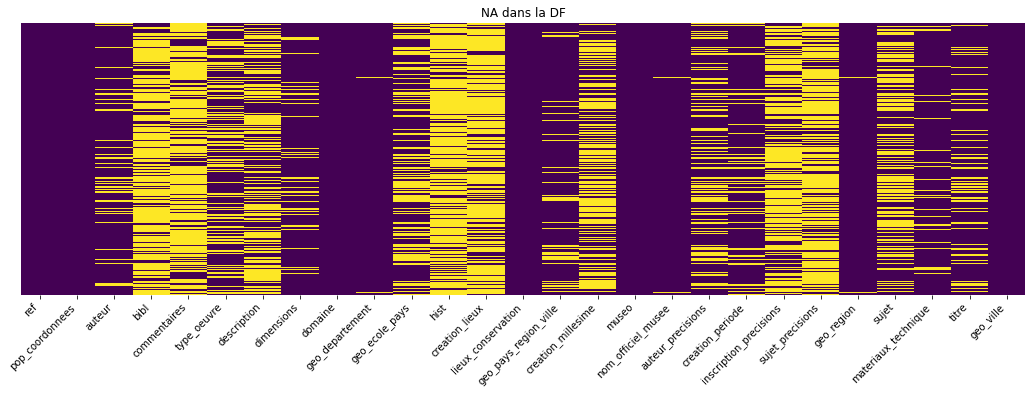

In [4]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_origin.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF")
figure.set_size_inches(18, 5, forward=True)
plt.show()

In [5]:
# df_global_full_clean = remove_na_columns(df_global_full, max_na=85, verbose=verbose, inplace=False)
na_columns_class = get_na_columns_classement(df_origin.copy(), verbose=1)

0 => 9 ['ref', 'pop_coordonnees', 'domaine', 'geo_departement', 'lieux_conservation', 'museo', 'nom_officiel_musee', 'geo_region', 'geo_ville']
9 => 1 ['materiaux_technique']
10 => 1 ['dimensions']
13 => 1 ['geo_pays_region_ville']
16 => 1 ['creation_periode']
17 => 1 ['auteur']
21 => 1 ['titre']
34 => 1 ['type_oeuvre']
36 => 1 ['auteur_precisions']
37 => 1 ['geo_ecole_pays']
45 => 1 ['sujet']
50 => 1 ['description']
57 => 1 ['creation_millesime']
61 => 1 ['inscription_precisions']
72 => 1 ['bibl']
73 => 2 ['creation_lieux', 'sujet_precisions']
75 => 2 ['commentaires', 'hist']


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Analyse des données
</div>

In [6]:
df_origin.describe()

,ref,pop_coordonnees,auteur,bibl,commentaires,type_oeuvre,description,dimensions,domaine,geo_departement,...,nom_officiel_musee,auteur_precisions,creation_periode,inscription_precisions,sujet_precisions,geo_region,sujet,materiaux_technique,titre,geo_ville
count,650853,650853,538804,178968,159876,426375,320511,581866,650851,644769,...,644769,414860,544555,249738,171724,644683,351558,587634,512385,650803
unique,639325,535,70076,127357,89749,21998,202281,361826,6343,98,...,428,51828,1598,203663,123191,15,241899,68499,346340,428
top,08880000225,"48.859903,2.340929",anonyme,Annales du Muséum d'Histoire Naturelle de Nice...,Datation : blog d'Antoine Sausverd : Topfferiana,tableau,Mine de plomb sur papier,H. 9 ; l. 14,dessin,Paris,...,musée du Louvre,"Paris, 1840 ; Meudon, 1917",19e siècle,L.1915 A,iconographie religieuse,Ile-de-France,paysage,mine de plomb,(Sans titre),Paris
freq,2,140845,58279,6119,1155,63839,1968,2504,236209,190773,...,142102,12720,46937,1741,1190,265436,7147,33202,4656,190110


In [7]:
df_origin.describe(include="all")

,ref,pop_coordonnees,auteur,bibl,commentaires,type_oeuvre,description,dimensions,domaine,geo_departement,...,nom_officiel_musee,auteur_precisions,creation_periode,inscription_precisions,sujet_precisions,geo_region,sujet,materiaux_technique,titre,geo_ville
count,650853,650853,538804,178968,159876,426375,320511,581866,650851,644769,...,644769,414860,544555,249738,171724,644683,351558,587634,512385,650803
unique,639325,535,70076,127357,89749,21998,202281,361826,6343,98,...,428,51828,1598,203663,123191,15,241899,68499,346340,428
top,08880000225,"48.859903,2.340929",anonyme,Annales du Muséum d'Histoire Naturelle de Nice...,Datation : blog d'Antoine Sausverd : Topfferiana,tableau,Mine de plomb sur papier,H. 9 ; l. 14,dessin,Paris,...,musée du Louvre,"Paris, 1840 ; Meudon, 1917",19e siècle,L.1915 A,iconographie religieuse,Ile-de-France,paysage,mine de plomb,(Sans titre),Paris
freq,2,140845,58279,6119,1155,63839,1968,2504,236209,190773,...,142102,12720,46937,1741,1190,265436,7147,33202,4656,190110


<div style="display: flex; background-color: indigo;" >

#### 2.3. Value counts
</div>

In [8]:
print(df_origin['lieux_conservation'].value_counts())

Paris;musée du Louvre département des Arts graphiques                  133448
Saint-Germain-en-Laye;musée d'Archéologie nationale                     35896
Marseille;musée des Civilisations de l'Europe et de la Méditerranée     21268
Sèvres;Sèvres - Cité de la céramique                                    17348
Chantilly;musée Condé                                                   13679
                                                                        ...  
Nîmes;musée des beaux -arts                                                 1
Vizille;Musée de la Révolution française                                    1
Nîmes;Muséum d'Histoire Naturelle                                           1
ParisÂ;musée de la musique;manquant                                         1
dépôt;Laon;musée archéologique municipal                                    1
Name: lieux_conservation, Length: 1048, dtype: int64


<div style="display: flex; background-color: indigo;" >

#### 2.5. Traitement de l'encodage
</div>

Suite à la première analyse, il y a un soucis d'encodage dans toute la DF, j'ai décidé de traiter l'encodage en ligne de commandes directement dans le fichier source, par exemple :
- `sed -i "s/Ã¹/ù/g" base-joconde-extrait_encoding.csv`
- `grep -E 'Ã' base-joconde-extrait_encoding.csv`
- `sed -i "s/àle-de-France/Ile-de-France/g" base-joconde-extrait_encoding.csv`

Cependant le à ne semble pas pouvoir être traité avec cette méthode, je le remplace donc dans la DF.

In [9]:
df_encode = cojonet.proceed_encoding(df_origin, verbose=verbose)

<div style="display: flex; background-color: indigo;" >

#### 2.4. Doublons
</div>

Il semble y avoir des doublons sur la référence, il est préférable de vérifier : 
- aucun doublon sur la totalité de la ligne
- vérification des doublons sur la référence : `11528 rows` en doublon sur la référence

In [10]:
df_encode[df_encode.duplicated()]

,ref,pop_coordonnees,auteur,bibl,commentaires,type_oeuvre,description,dimensions,domaine,geo_departement,...,nom_officiel_musee,auteur_precisions,creation_periode,inscription_precisions,sujet_precisions,geo_region,sujet,materiaux_technique,titre,geo_ville
184868,08880000514,"0.0,0.0",ISLER Véra,NaN,NaN,tirage photographique,Photographie noir et blanc sur Papier Marouflé,"H. 165, L. 118",photographie,Alpes-Maritimes,...,musée d'Art Moderne et d'Art Contemporain,"Berlin, 1931 ; femme",4e quart 20e siècle,NaN,NaN,Provence-Alpes-Côte d'Azur,NaN,NaN,Portrait de William Wegman,Nice
185128,08880000100,"0.0,0.0",GAINON Jacqueline,". Autour de Nice... : Acropolis, Nice, juin 19...",NaN,tableau,Acrylique sur toile,"H. 170, L. 140",peinture,Alpes-Maritimes,...,musée d'Art Moderne et d'Art Contemporain,"Nice, 1951 ; femme",4e quart 20e siècle,S.B.G.: J.Gainon,NaN,Provence-Alpes-Côte d'Azur,NaN,NaN,Tango,Nice
185140,08880001129,"0.0,0.0",CHUBAC Albert,NaN,NaN,NaN,Collage,"H. 64, L. 49",dessin,Alpes-Maritimes,...,musée d'Art Moderne et d'Art Contemporain,"Genève, 1925",4e quart 20e siècle,NaN,NaN,Provence-Alpes-Côte d'Azur,NaN,NaN,Sans titre,Nice
185388,04640008298,"0.0,0.0",anonyme (photographe);KODAK (éditeur),NaN,NaN,tirage photographique,NaN,Hauteur en mm 95 ; Longueur en mm 136,photographie,Gard,...,musée Pierre-de-Luxembourg,NaN,20e siècle,"nom de l'éditeur, Verso : TRAITE PAR / KODAK /...",NaN,Occitanie,"paysage (Villeneuve-lès-Avignon, maison, olivier)","papier, noir et blanc",Villeneuve-lès-Avignon : mazet et olivier,Villeneuve-lès-Avignon
185496,02470000389,"0.0,0.0",GEORGIN François (graveur);PELLERIN (fabrique),NaN,NaN,NaN,Chromoxylographie sur papier vergé,Hauteur en cm 63 ; Largeur en cm 48,estampe,Indre,...,musée Bertrand,"GEORGIN François : ?, 1801 ; ?, 1863#PELLERIN ...",19e siècle,NaN,NaN,Centre-Val de Loire,NaN,"papier vergé (xylographie, couleur)",La Colonne,Châteauroux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649202,04640006767,"0.0,0.0",anonyme (photographe);PREVOT (éditeur),NaN,NaN,carte postale,NaN,Hauteur en mm 89 ; Longueur en mm 139,photographie,Gard,...,musée Pierre-de-Luxembourg,"Edit Prévot, 26, République, Avignon",1er quart 20e siècle,"titre, Haut et centre : 2 bis. AVIGNON - Les B...",NaN,Occitanie,vue d'architecture;paysage (Villeneuve-lès-Avi...,"papier cartonné, imprimé, noir et blanc",Avignon : vue générale depuis Villeneuve,Villeneuve-lès-Avignon
649204,04640006777,"0.0,0.0",anonyme (photographe);RELLA (éditeur),NaN,NaN,carte postale,NaN,Hauteur en mm 90 ; Longueur en mm 141,photographie,Gard,...,musée Pierre-de-Luxembourg,"Editions RELLA, Nice (A.-M.)",20e siècle,"nom de l'éditeur, Bas et droite : Rella ; titr...",NaN,Occitanie,vue d'architecture;paysage (Villeneuve-lès-Avi...,"papier cartonné, imprimé, noir et blanc",Avignon : vue générale depuis Villeneuve,Villeneuve-lès-Avignon
649205,04640008157,"0.0,0.0",MAROTTE (graveur);BULLOZ Jacques Ernest (éditeur),NaN,NaN,carte postale,NaN,Hauteur en mm 90 ; Longueur en mm 140,photographie;estampe,Gard,...,musée Pierre-de-Luxembourg,"BULLOZ : Paris, 1858 ; Paris, 1942 ; J.-E. Bul...",20e siècle,"titre, Recto : N°20714. - ENGUERRAND CHARONTON...",NaN,Occitanie,"paysage (Villeneuve-lès-Avignon, Vierge, Chris...","papier cartonné, héliogravure",Villeneuve-lès-Avignon : Le Couronnement de la...,Villeneuve-lès-Avignon
649210,05630030212,"43.608897,1.441776",NaN,"Ernest Roschach , Musée de Toulouse. Catalogue...",NaN,statue;fragment,"Roschach 1865 p. 94 : ""Fragments de sculptures...",Hauteur en cm 8 ; Longueur en cm 21 ; Largeur ...,archéologie;sculpture;romain,Haute-Garonne,...,musée Saint-Raymond,NaN,1er siècle av JC,NaN,NaN,Occitanie,"(main, anneau)",marbre,Main gauche,Toulouse


In [11]:
df_clean = cojonet.proceed_duplicated(df_encode, verbose=verbose)

<div style="display: flex; background-color: indigo;" >

#### 2.4. Traitement des NA
</div>

- Remplacement des Sans Titre
- Remplacement des anonyme
- `91 970` lignes n'ont ni auteur, ni titre, ni description, ni tout autre complément permettant de d'aboutir sur ces objets. je les supprime donc.
- Titre et Auteur : `151 647` lignes n'ont ni auteur, ni titre : générer un titre pertient à partir des descriptions.
- Type Oeuvre
- Création d'une colonne de texte avec toutes les colonnes de descriptions

In [12]:
df_clean_na = cojonet.proceed_na_values(df_clean, verbose=verbose)

In [13]:
df_clean_finaly = df_clean_na[['ref', 'titre', 'auteur', 'texte','type_oeuvre',
       'materiaux_technique', 'dimensions','museo',
       'nom_officiel_musee', 'domaine', 'pop_coordonnees', 'geo_ville', 'geo_departement', 'geo_region',
       'geo_pays_region_ville', 'geo_ecole_pays', 'hist', 'creation_periode', 'creation_millesime',
       'creation_lieux', 'lieux_conservation', 'auteur_precisions',
       'inscription_precisions','sujet_precisions', 'sujet',  'description', 'commentaires']]
display(HTML(df_clean_finaly.head().to_html()))

,ref,titre,auteur,texte,type_oeuvre,materiaux_technique,dimensions,museo,nom_officiel_musee,domaine,pop_coordonnees,geo_ville,geo_departement,geo_region,geo_pays_region_ville,geo_ecole_pays,hist,creation_periode,creation_millesime,creation_lieux,lieux_conservation,auteur_precisions,inscription_precisions,sujet_precisions,sujet,description,commentaires
0,M0435002007,En Détresse,LE GULUCHE Joseph Marie,"groupe de deux pêcheurs et un enfant en détresse à la proue d'une embarcation en difficulté. Terre cuite d'édition ; terre cuite, naturel. scène (naufrage, tempête, vague, bateau, marin pêcheur, homme, enfant, peur)",statuette,terre cuite,"l. 30 cm ; H. 65 cm ; P. 22 cm ; VOLUM. 0,0429",M0435,musée d'Art et d'Histoire Louis Senlecq,sculpture,"49.112285,2.21638",L'Isle-Adam,Val-d'Oise,Ile-de-France,NaN,France,"voir aussi : 2010.0.4, 2010.0.87 En Détresse",4e quart 19e siècle;1er quart 20e siècle,1890 entre;1908 et,France;Ile-de-France;Val d'Oise;L'Isle-Adam (lieu de création),L'Isle-Adam;musée Louis Senlecq,"Plourivo, 1849; Villejuif, 1915",Signé sur la terrasse au revers de la pièce : J. Le Guluche ; Cachet : Alphonse Hanne n°92 ; Inscription à l'avant de la pièce : En Détresse,groupe de deux pêcheurs et un enfant en détresse à la proue d'une embarcation en difficulté,"scène (naufrage, tempête, vague, bateau, marin pêcheur, homme, enfant, peur)","Terre cuite d'édition ; terre cuite, naturel",NaN
1,M0435001924,Bazeilles,THOMSEN Constant,"le titre : Bazeilles, fait peut-être un rappel de l'épisode de la guerre de 1870 : la bataille à Bazeilles. terre cuite, naturel. portrait (homme, en buste, expression du visage, douleur)",buste,terre cuite,"l. 30 CM ; H. 62 CM ; P. 23 CM ; VOLUM. 0,0428",M0435,musée d'Art et d'Histoire Louis Senlecq,sculpture,"49.112285,2.21638",L'Isle-Adam,Val-d'Oise,Ile-de-France,NaN,Danemark,voir aussi : n° 2010.0.25 Buste de Renet Tener,4e quart 19e siècle;1er quart 20e siècle,NaN,NaN,L'Isle-Adam;musée Louis Senlecq,"né en 1860 ; mort en 1921, actif vers 1893","Signé au revers de la pièce sur l'épaule droite : C. Thomsen ; Cachet au revers de la pièce : Union Artistique de la Sculpture Française, et en dessous cachet rectangulaire : 8016 LE MFI PARIS ; Inscription à l'avant de la pièce : BAZEILLES","le titre : Bazeilles, fait peut-être un rappel de l'épisode de la guerre de 1870 : la bataille à Bazeilles","portrait (homme, en buste, expression du visage, douleur)","terre cuite, naturel",NaN
2,M0435002028,Vase ovoïde sur talon en étain,FJERDINGSTAD Christian (orfèvre),Vase ovoïde sur talon en étain,vase,étain,"H. 16,4 cm",M0435,musée d'Art et d'Histoire Louis Senlecq,orfèvrerie,"49.112285,2.21638",L'Isle-Adam,Val-d'Oise,Ile-de-France,NaN,Danemark,"voir aussi : 2010.5.1, 2010.5.2, 2010.5.3, 2010.5.4, 2010.5.5",1ère moitié 20e siècle,1920 entre;1930 et,France;Ile-de-France;Val d'Oise;L'Isle-Adam (lieu de création),L'Isle-Adam;musée Louis Senlecq,"né en 1891 ; mort en 1968 ; Christian Fjerginstad avait son atelier d'orfèvrerie à L'Isle-Adam de 1921 à 1960, 19 rue Martel, il travailla pour Christofle de 1921 à 1941",Poinçon : Etain de L'Isle-Adam ; n° 10-89 à l'intérieur du talon de la pièce ; signé à l'intérieur du talon : FJERGINSTAD,NaN,NaN,Vase ovoïde sur talon en étain,NaN
3,08120020599,"Porte d'un édifice, à Daours ; Daours : Porte (autre titre)",DUTHOIT Louis,"Ce dessin représente une porte d'édifice à Daours (Somme), avec tympan et archivolte sculptée. Encre sur papier calque collé sur papier blanc. vue d'architecture (Daours, porte, archivolte)","encre, papier calque, papier (blanc) Encre sur papier calque collé sur papier blanc","encre, papier calque, papier (blanc)",Hauteur en cm 10.7 ; Largeur en cm 8,M0812,musée de Picardie,dessin,"49.890413,2.295968",Amiens,Somme,Hauts-de-France,Picardie ; Somme,France,NaN,3e quart 19e siècle,1850,NaN,Amiens;musée de Picardie,"DUTHOIT : Amiens, 1807/04/15 ; Amiens, 1874/12/30 ; nationalité : Française","monogrammé, en bas à gauche : L D ; annoté, sur le montage, en h

<div style="display: flex; background-color: deeppink;" >

##### Etat des lieux des NaN après traitement
</div>

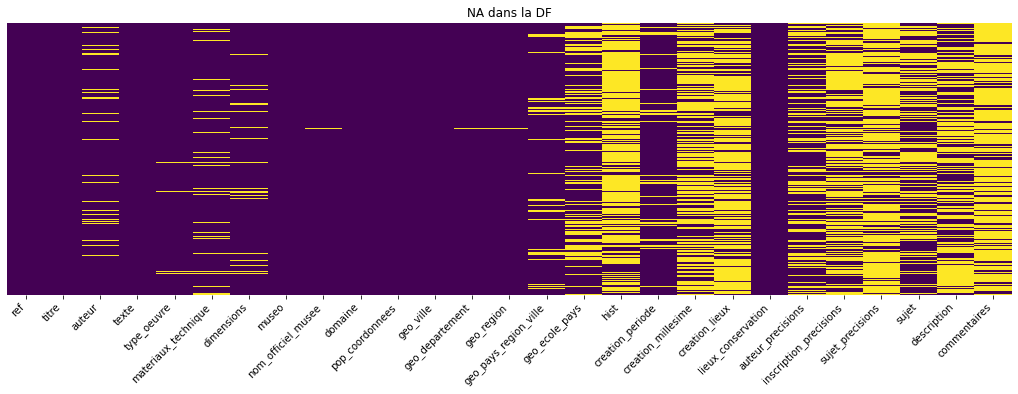

In [14]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_clean_finaly.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF")
figure.set_size_inches(18, 5, forward=True)
plt.show()

In [ ]:
data_set_path_clean = join(data_set_path,data_set_file_name.replace(".csv", "_clean.csv"))
df_clean_finaly.to_csv(data_set_path_clean, index=False)
print(f"DataFrame save in ------> {data_set_path_clean}")

<div style="display: flex; background-color: blue;" >

# SEPARATION des données
</div>

In [15]:
run_extraction = 0

<div style="display: flex; background-color: indigo;" >

#### METIERS
</div>

In [16]:
if run_extraction > 0:
    df_metiers= cojonet.extract_data(df=df_clean_finaly, src_col_name="auteur", dest_col_name="metier", clean_function=cojonet.clean_metier, separator="\)", dest_path=data_set_path, dest_file_name='metiers_uniques.csv', verbose=verbose)
else:
    df_metiers = pd.read_csv(join(data_set_path,'cojoden_metiers_uniques.csv'))
print(f"{df_metiers.shape} données chargées ------> {list(df_metiers.columns)}")

(251, 2) données chargées ------> ['search', 'metier']


<div style="display: flex; background-color: indigo;" >

#### VILLES
</div>

In [17]:
print(df_clean_finaly.loc[df_clean_finaly['geo_ville']=='Rennes', 'geo_departement'].value_counts().index[0])
print(df_clean_finaly.loc[df_clean_finaly['geo_ville']=='Rennes', 'geo_region'].value_counts().index[0])
print(df_clean_finaly.loc[df_clean_finaly['geo_ville']=='Rennes', 'geo_pays_region_ville'].value_counts().index[0])

Ille-et-Vilaine
Bretagne
France ; Bretagne ; Ille-et-Vilaine


In [18]:
run_extraction = 1
if run_extraction > 0:
    df_villes = cojonet.extract_villes(df=df_clean_finaly, dest_path=data_set_path, dest_file_name='villes_departement_region_pays.csv',verbose=verbose)
else:
    df_villes = pd.read_csv(join(data_set_path,'cojoden_villes_departement_region_pays.csv'))
print(f"{df_villes.shape} données chargées ------> {list(df_villes.columns)}")

c:\Users\User\WORK\workspace-ia\PROJETS\projet_cojoden_avance\cojoden_nettoyage.py:168: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df_cities = df_cities.dropna('ville')


ValueError: No axis named ville for object type DataFrame

In [ ]:
df_villes[(df_villes['pays'].notna()) & (df_villes['pays']!='France')]

,ville,departement,region1,region2,pays
48,Bonn,NaN,NaN,NaN,Allemagne
61,Bruxelles,NaN,NaN,NaN,Belgique
115,Dublin,NaN,NaN,NaN,République d'Irlande
116,Dublin,NaN,NaN,NaN,République d'Irlande
168,Le Vatican,NaN,NaN,NaN,Italie
180,Londres,NaN,NaN,NaN,Grande-Bretagne
187,Luxembourg,NaN,NaN,NaN,Luxembourg
284,Rome,NaN,NaN,NaN,Italie
296,Saint-Denis,Seine-Saint-Denis,Ile-de-France,NaN,La Réunion
297,Saint-Denis de La Réunion,Réunion,NaN,NaN,La Réunion


In [ ]:
df_villes[(df_villes['departement'].isna())]

,ville,departement,region1,region2,pays
48,Bonn,NaN,NaN,NaN,Allemagne
59,Briançon,NaN,NaN,NaN,France
61,Bruxelles,NaN,NaN,NaN,Belgique
71,Castellare-di-Mercurio,NaN,Corse,NaN,France
115,Dublin,NaN,NaN,NaN,République d'Irlande
116,Dublin,NaN,NaN,NaN,République d'Irlande
168,Le Vatican,NaN,NaN,NaN,Italie
180,Londres,NaN,NaN,NaN,Grande-Bretagne
187,Luxembourg,NaN,NaN,NaN,Luxembourg
284,Rome,NaN,NaN,NaN,Italie


<div style="display: flex; background-color: indigo;" >

#### MUSEES
</div>

In [13]:
if run_extraction > 0:
    df_musees = cojonet.extract_musees(df=df_clean_finaly, dest_path=data_set_path, dest_file_name='musees.csv', verbose=verbose)
else:
    df_musees = pd.read_csv(join(data_set_path,'cojoden_musees.csv'))
print(f"{df_musees.shape} données chargées ------> {list(df_musees.columns)}")

(463, 8) données chargées ------> ['museo', 'nom', 'ville', 'latitude', 'longitude', 'pop_coordonnees', 'nom_search', 'ville_src']


<div style="display: flex; background-color: indigo;" >

#### AUTEURS
</div>

In [10]:
if run_extraction > 0:
    df_artistes = cojonet.extract_artistes(df=df_clean_finaly, dest_path=data_set_path, dest_file_name='artistes.csv', verbose=verbose)
else:
    df_artistes = pd.read_csv(join(data_set_path,'cojoden_artistes.csv'))
print(f"{df_artistes.shape} données chargées ------> {list(df_artistes.columns)}")

(46298, 3) données chargées ------> ['nom_naissance', 'nom_dit', 'nom_search']


<div style="display: flex; background-color: indigo;" >

#### MATERIAUX
</div>

In [15]:
if run_extraction > 0:
    df_materiaux = cojonet.extract_materiaux_technique(df=df_clean_na, dest_path=data_set_path, dest_file_name='materiaux_techniques.csv', verbose=verbose)
else:
    df_materiaux = pd.read_csv(join(data_set_path,'cojoden_materiaux_techniques.csv'))
print(f"{df_materiaux.shape} données chargées ------> {list(df_materiaux.columns)}")

(8482, 2) données chargées ------> ['materiaux_technique', 'mat_search']


<div style="display: flex; background-color: indigo;" >

#### OEUVRES
</div>

In [9]:
run_extraction = 1
if run_extraction > 0:
    df_oeuvres = cojonet.extract_oeuvres(df=df_clean_na, dest_path=data_set_path, dest_file_name='oeuvres.csv', verbose=0)
else:
    df_oeuvres = pd.read_csv(join(data_set_path,'cojoden_oeuvres.csv'), low_memory=False)
print(f"{df_oeuvres.shape} données chargées ------> {list(df_oeuvres.columns)}")

[extract_oeuvres]	 INFO : (605157, 14) données sauvegardées in ------> c:\Users\User\WORK\workspace-ia\PROJETS\projet_joconde\dataset\oeuvres.csv
(605157, 14) données chargées ------> ['ref', 'titre', 'type', 'domaine', 'texte', 'lieux_conservation', 'annee_debut', 'annee_fin', 'inscriptions', 'commentaires', 'largeur_cm', 'hauteur_cm', 'profondeur_cm', 'creation_lieux']


<div style="display: flex; background-color: indigo;" >

#### CREER
</div>

In [10]:
if run_extraction > 0:
    df_creation_oeuvres = cojonet.extract_creation_oeuvres(df=df_clean_na, dest_path=data_set_path, dest_file_name='creation_oeuvres.csv', verbose=verbose)
else:
    df_creation_oeuvres = pd.read_csv(join(data_set_path,'cojoden_creation_oeuvres.csv'), low_memory=False)
print(f"{df_creation_oeuvres.shape} données chargées ------> {list(df_creation_oeuvres.columns)}")

c:\Users\User\WORK\workspace-ia\PROJETS\projet_joconde\cojoden_nettoyage.py:741: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1["auteur"].notna(),'auteur_list'] =  df1.loc[df1["auteur"].notna(),'auteur'].apply(lambda x: clean_artiste(input_artiste=x, clean_dit_at_begin=True, join=True, verbose=verbose-1))
c:\Users\User\WORK\workspace-ia\PROJETS\projet_joconde\cojoden_nettoyage.py:742: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['auteur_list2'] = df1['auteur_list']


(639500, 3) données chargées ------> ['auteur', 'oeuvre', 'role']


In [11]:
df_creation_oeuvres

,auteur,oeuvre,role
0,LE GULUCHE JOSEPH MARIE,M0435002007,NaN
1,THOMSEN CONSTANT,M0435001924,NaN
2,FJERDINGSTAD CHRISTIAN,M0435002028,orfèvre
3,DUTHOIT LOUIS,08120020599,NaN
4,DUTHOIT AIME,08120020608,NaN
...,...,...,...
185396,GUICHARD E,M0381001687,dessinateur
185396,THIERRY FRERES,M0381001687,lithographe
185396,JOREL ADRIEN,M0381001687,dessinateur
185396,MULLER C,M0381001687,dessinateur


<div style="display: flex; background-color: indigo;" >

#### DOMAINE
</div>

Suite à une première analyse, il n'y a pas d'intérêt à traiter les domaines.

In [85]:
df_clean_na['domaine'].value_counts()

dessin                                                                                235107
peinture                                                                               66689
estampe                                                                                38680
sculpture                                                                              30266
photographie                                                                           13482
                                                                                       ...  
industrie lithique;industrie osseuse;agriculture - élevage;néolithique;archéologie         1
peinture;philatélie                                                                        1
horlogerie;ethnologie;métrologie - instruments de mesure;vie militaire                     1
sculpture;Afrique;ethnologie                                                               1
ethnologie;artisanat - industrie;vie militaire                        

In [87]:
df_clean_na.columns

Index(['ref', 'pop_coordonnees', 'auteur', 'bibl', 'commentaires',
       'type_oeuvre', 'description', 'dimensions', 'domaine',
       'geo_departement', 'geo_ecole_pays', 'hist', 'creation_lieux',
       'lieux_conservation', 'geo_pays_region_ville', 'creation_millesime',
       'museo', 'nom_officiel_musee', 'auteur_precisions', 'creation_periode',
       'inscription_precisions', 'sujet_precisions', 'geo_region', 'sujet',
       'materiaux_technique', 'titre', 'geo_ville', 'texte'],
      dtype='object')

In [88]:
df_domaine = df_clean_na[['domaine']]
df_domaine["search_domaine"] = df_domaine['domaine']
df_domaine = convert_df_string_to_search_string(input_df=df_domaine, col_name="search_domaine", stop_word_to_remove=[])
df_domaine["search_domaine"].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_57960\10413957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_domaine["search_domaine"] = df_domaine['domaine']


DESSIN                                                                              235107
PEINTURE                                                                             66689
ESTAMPE                                                                              38680
SCULPTURE                                                                            30266
PHOTOGRAPHIE                                                                         13482
                                                                                     ...  
INDUSTRIE LITHIQUE INDUSTRIE OSSEUSE AGRICULTURE ELEVAGE NEOLITHIQUE ARCHEOLOGIE         1
PEINTURE PHILATELIE                                                                      1
HORLOGERIE ETHNOLOGIE METROLOGIE INSTRUMENTS DE MESURE VIE MILITAIRE                     1
SCULPTURE AFRIQUE ETHNOLOGIE                                                             1
ETHNOLOGIE ARTISANAT INDUSTRIE VIE MILITAIRE                                             1

<div style="display: flex; background-color: indigo;" >

#### PERIODES
</div>

In [431]:
# ser_per=pd.Series(", ".join(df_clean['creation_periode'].dropna()).split(";"))
# df_periode1 = pd.DataFrame([ser_per]).T
# print(df_periode1.shape)
# df_periode1 = df_periode1.drop_duplicates()
df_periode2 = df_clean['creation_periode'].dropna().str.split(r";", expand=True)
print(df_periode2.shape)
df_periode2 = df_periode2.drop_duplicates()
print(df_periode2.shape)
df_periode2.head()

(482266, 11)
(1504, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,4e quart 19e siècle,1er quart 20e siècle,None,None,None,None,None,None,None,None,None
2,1ère moitié 20e siècle,None,None,None,None,None,None,None,None,None,None
3,3e quart 19e siècle,None,None,None,None,None,None,None,None,None,None
5,2e quart 19e siècle,None,None,None,None,None,None,None,None,None,None
10,18e siècle,None,None,None,None,None,None,None,None,None,None


In [432]:
df_periode2[df_periode2[10].notna()]

,0,1,2,3,4,5,6,7,8,9,10
6482,1ère moitié 2e siècle av JC,1er siècle av JC,1er siècle,2e siècle,3e siècle,4e siècle,5e siècle,6e siècle,7e siècle,8e siècle,1ère moitié 9e siècle


In [433]:
periodes = set(df_periode2.loc[df_periode2[0].notna(), 0].unique())
periodes

{'1000e millénaire av JC',
 '10e siècle',
 '10e siècle av JC',
 '11e siècle',
 '11e siècle av JC',
 '12e siècle',
 '12e siècle av JC',
 '13e siècle',
 '13e siècle av JC',
 '14e siècle',
 '14e siècle av JC',
 '15e siècle',
 '15e siècle av JC',
 '16e siècle',
 '16e siècle av JC',
 '16eÂ\xa0siècle',
 '16ème siècle',
 '17 e siècle',
 '17e siècle',
 '17e siècle av JC',
 '17è Siècle',
 '17ème siècle',
 '17ème siècle, 2ème quart',
 '18e siècle',
 '18e siècle av JC',
 '18eme siècle',
 '19e',
 '19e siècle',
 '19e siècle (1er quart)',
 '19e siècle (1ère moitié)',
 '19e siècle (3e quart)',
 '19e siècle (4e quart)',
 '19e siècle av JC',
 '19è siècle',
 '19ème siècle 1er quart',
 '19ème siècle 1ère moitié',
 '19ème siècle 3ème quart',
 '19ème siècle 4ème quart',
 '1e quart 18e siècle',
 '1e quart 20e siècle',
 '1e siècle av JC',
 '1er millénaire av JC',
 '1er quart  19e siècle',
 '1er quart  20e siècle',
 '1er quart 10e siècle',
 '1er quart 10e siècle av JC',
 '1er quart 11e siècle',
 '1er quart 12

In [434]:
for i in range(1, 11):
    print(f"{i-1} - {len(periodes)}")
    for val in df_periode2.loc[df_periode2[i].notna(), i].unique():
        periodes.add(val)

print(f"{i-1} - {len(periodes)}")
periodes

0 - 356
1 - 401
2 - 407
3 - 409
4 - 411
5 - 413
6 - 413
7 - 413
8 - 413
9 - 413
9 - 413


{'(?)',
 '1000e millénaire av JC',
 '10e siècle',
 '10e siècle av JC',
 '11e siècle',
 '11e siècle av JC',
 '12e siècle',
 '12e siècle av JC',
 '13e siècle',
 '13e siècle av JC',
 '14e siècle',
 '14e siècle av JC',
 '15e siècle',
 '15e siècle av JC',
 '16e siècle',
 '16e siècle av JC',
 '16eÂ\xa0siècle',
 '16ème siècle',
 '17 e siècle',
 '17e siècle',
 '17e siècle av JC',
 '17è Siècle',
 '17ème siècle',
 '17ème siècle, 2ème quart',
 '18e siècle',
 '18e siècle av JC',
 '18eme siècle',
 '19e',
 '19e siècle',
 '19e siècle (1er quart)',
 '19e siècle (1ère moitié)',
 '19e siècle (3e quart)',
 '19e siècle (4e quart)',
 '19e siècle av JC',
 '19e siècle et',
 '19è siècle',
 '19ème siècle 1er quart',
 '19ème siècle 1ère moitié',
 '19ème siècle 3ème quart',
 '19ème siècle 4ème quart',
 '1e quart 18e siècle',
 '1e quart 19e siècle',
 '1e quart 1er siècle',
 '1e quart 20e siècle',
 '1e siècle av JC',
 '1er millénaire av JC',
 '1er quart   20e siècle',
 '1er quart  18e siècle',
 '1er quart  19e siè

In [170]:
ser_auteurs=pd.Series(", ".join(df_auteur_origin["auteur"].dropna()).split(";"))
df_auteurs1 = pd.DataFrame([ser_auteurs]).T

ser_auteurs=pd.Series(", ".join(df_auteurs1[0].dropna()).split(", "))
df_auteurs = pd.DataFrame([ser_auteurs]).T
df_auteurs = df_auteurs.rename(columns={0:'name'})
df_auteurs.head()

,name
0,LE GULUCHE Joseph Marie
1,THOMSEN Constant
2,FJERDINGSTAD Christian (orfèvre)
3,DUTHOIT Louis
4,DUTHOIT Aimé


In [171]:
print(df_auteurs.shape)
df_auteurs = df_auteurs.drop_duplicates()
print(df_auteurs.shape)

(136322, 1)
(70115, 1)


In [206]:
temp = df_auteurs['name'].str.split(r" \(", expand=True)
temp.head()

,0,1,2,3
0,LE GULUCHE Joseph Marie,None,None,None
1,THOMSEN Constant,None,None,None
2,FJERDINGSTAD Christian,orfèvre),None,None
3,DUTHOIT Louis,None,None,None
4,DUTHOIT Aimé,None,None,None


In [207]:
temp[1].value_counts()

graveur)                    3158
peintre)                    3058
d'après)                    2772
éditeur)                    2576
dessinateur)                2553
                            ... 
LANTZ                          1
1791-1849)                     1
1720-1789)                     1
auteur du modèle))             1
République démocratique)       1
Name: 1, Length: 825, dtype: int64

In [208]:
temp[2].value_counts()

peintre)                   83
dessinateur)               69
émetteur)                  41
?)                         36
d'après)                   28
                           ..
orfèvre)                    1
écrivain))                  1
sculpteur                   1
LEGROS D'ANIZY              1
d'après la peinture de)     1
Name: 2, Length: 82, dtype: int64

In [209]:
temp[3].value_counts()

auteur du modèle)     1
auteur du modèle))    1
auteur du décor))     1
?)                    1
Name: 3, dtype: int64

In [210]:
temp[temp[3].notna()]

,0,1,2,3
1482,LEGROS D'ANIZY,graveur),manufacture de Creil,auteur du modèle)
3019,FAIENCERIES DE CREIL & MONTEREAU,attribué à),FAIENCERIES DE CREIL & MONTEREAU,auteur du modèle))
62203,LEGROS D'ANIZY,graveur),LEGROS D'ANIZY,auteur du décor))
73363,VALENTINIEN IER,FLAVIUS VALENTINIANUS),émetteur),?)


In [413]:
temp = df_auteurs['name'].str.split(r" \(", expand=True)

to_replace_nan = ["d'après", "entourage de", 'née','né', "d'après le dessin de", 
                "suite de", "inspiré par", 'attribué à', 'population', "d'après la peinture de",
                "copie d'après", "amateur", "Collectivité", "usine", "école", "manufacture de Creil",
                "fabrique", "FAIENCERIES DE CREIL & MONTEREAU", "chantier naval", "attribué",
                "style", "attribué à", "dit", "atelier de", "d'après", "attribué Ã "]

to_replace_nan_contains = ["attribué", "manufacture", "patronyme", "1809-", "manière de", "fours de", "Attribué à", 'ateliers', 
'autre attribution', 'FAUX','dit,école de', 'arcades du casino', 'style', 'attr. à', 'faux', 'ECOLE DE','ATTRIBUE','d¹après',
'd’après', 'bar-tabac', 'bazar', 'Attribué'
'établissement', 'dit','atelier de la famille', "d'après la gravure de", 'atelier indéterminé',"D\'","h.",'R M','Cherbourg 1856 - Paris 1913',
'italie','imitation de','école de berry','inspiré par','atelier artistique','?,école','anonyme','laboratoire','groupe de rock','atelier ,','actif vers 1787',
'collection f','autour de','commencé par','terminé par','atelier,?','rue de la paix paris','?,dit','attibué à','ancienne attribution',
'd\x92après','école des','ancienne maison','09',
'pour les fleurs','famillle','pour les personnages',
]
 
to_replace_by = {
        "\)"                        : "",
        '\?'                        : "",
        "couturière"                :"couturier",
        'sculptrice'                :"sculpteur",
        "sculpeur"                  :"sculpteur",
        'sculpteur-repareur'        :"sculpteur, répareur",
        "Editeur"                   :"éditeur",
        'M.-D - EDITEUR - PARIS'    :"éditeur",
        'éditeurPAITL. S. éditeur'  :"éditeur",
        "éditeur d'après CLOUET"    :"éditeur",
        'édition Artistique'        :"éditeur",
        'éditions de luxe'          :"éditeur",
        'éditeur(?'                 :"éditeur",
        'éditeur,?'                 :"éditeur",
        'ouvrier '                  :'',
        'ENGINEERS Ltd.'            :'ingénieur',
        'établissements photographiques':'photographe',
        'compagnie alsacienne des arts photomecaniques':'photographe photomecaniques',
        'photographe,'              :'photographe',
        'lithographe DURAND H'      :'lithographe',
        'composition'               :'compositeur',
        'dit(caricaturiste'         :'caricaturiste',
        "graveur d'après CLOUET"    :"graveur",
        'graveur BASSET'            :'graveur',
        "graveur d'après"           :'graveur',
        'Libraire'                  :'libraire',
        # 'libraire,éditeur'          :'libraire',
        # 'imprimeur,éditeur'         :'imprimeur',
        '18...-18 imprimeur'        :'imprimeur',
        'imprimeur imp. Paris 1933' :'imprimeur',
        'imprimeur colin paul'      :'imprimeur',
        'imprimerie phototypique'   :'imprimeur phototypique',
        'imprimeure photographique' :'imprimeur photographique',
        'imprimeur ã\xa0 marseille' :'imprimeur',
        'imprimeur paris'           :'imprimeur',
        'phototypie ,imprimeur'     :'imprimeur',
        'imprmeur'                  :'imprimeur',
        'imprimeur-libraire'        :'imprimeur, libraire',
        'imprimeur 53 rue rochechouart paris':'imprimeur',
        'dit(dessinateur'           :'dessinateur',
        'fondeurs'                  :'fondeur',
        'dit(inventeur'             :'inventeur',
        'dessinateur  creation imp' :'dessinateur',
        'dessinateur,cartonnier'    :'dessinateur, cartonnier',
        'dit(peintre'               :'peintre',
        '?,peintre'                 :'peintre',
        'décoratrice'               :'décorateur',
        'artiste-décorateur'        :'décorateur',
        'décorateur?'               :'décorateur',
        'imprimeur comite national de defense contre la tuberculose':'imprimeur',
        'architecte(s et sculpteur(s':'architecte, sculpteur',
        'maitre-'                   :"maître-",
        'maitre '                   :"maître-",
        'maître- '                  :"maître-",
        'facteur de clavecins'      :'facteur',
        '?,'                        :'',
        '(?'                        :'',
        ',?'                        :'',
        'eleve'                     :'élève',
    }

temp.loc[temp[2]==temp[1], 2] = np.nan

# 557 rows × 3 columns
for col in [1,2,3]:
    # - 6 rows
    temp.loc[(temp[col].notna()), col] = temp.loc[(temp[col].notna()), col].str.replace(")", "", regex=False)
    temp.loc[(temp[col].notna()), col] = temp.loc[(temp[col].notna()), col].str.replace("?", "", regex=False)
    temp.loc[(temp[col].notna()), col] = temp.loc[(temp[col].notna()), col].str.replace(r"^,", "", regex=True)
    temp.loc[(temp[col].notna()), col] = temp.loc[(temp[col].notna()), col].str.strip()

    temp.loc[(temp[col].notna()), col] = temp.loc[(temp[col].notna()), col].str.lower()

    for str_ in to_replace_nan:
        temp.loc[temp[col]==str_.strip().lower(), col] = np.nan
        
    # Suppression de toutes les dates
    # "1781-1864", '1852-…', '1837-1913', '1834-1916','1830-1884','1753-1823','1879-1946', '1791-1849', '1720-1789','1805-1863',
    # '1810-1887', '1739-1814', '1847-1914','1858 -1941', '1767-1855','1649-1712','1866-1937','1757-1836','1856- 1956','1834-1899',
    temp.loc[temp[col].notna(), col] = temp.loc[temp[col].notna(), col].str.replace("^\d{4}-\d{4}$", "", regex=True)
    
    for str_ in to_replace_nan_contains:
        temp.loc[(temp[col].notna()) & (temp[col].str.contains(str_.strip().lower(), regex=False)), col] = np.nan
            
    for str_, str_2 in to_replace_by.items():
        temp.loc[temp[col].notna(), col] = temp.loc[temp[1].notna(), col].str.replace(str_.strip().lower(), str_2.strip().lower(), regex=False)

    temp.loc[(temp[col].notna()) & (temp[col]==""), col] = np.nan
# 431 rows × 3 columns

In [408]:
temp[1] = temp[1].fillna(temp[2])
temp[1] = temp[1].fillna(temp[3])
temp.loc[temp[2]==temp[1], 2] = np.nan
temp.loc[temp[3]==temp[1], 3] = np.nan

In [411]:
temp[(temp[1].notna()) & (temp[2].notna())].head(20)

,0,1,2,3
178,VALENS,flavius valens,émetteur,None
892,DONADIER,couturier,couturier,None
1008,VALENTINIEN IER,flavius valentinianus,émetteur,None
1467,FAIENCERIES DE CREIL & MONTEREAU,lantz,auteur du décor,None
2060,VALENTINIEN III,placidius valentinianus,émetteur,None
2982,CONSTANT IER,flavius julius constans,émetteur,None
2983,MAXIME,magnus clemens maximus,émetteur,None
4411,GREBER Johann Peter,céramiste,auteur du modèle,None
4415,FAIENCERIES DE CREIL & MONTEREAU,froment richard antoine albert,auteur du décor,None
4909,XUANZONG,qing,émetteur,None


In [386]:
temp[(temp[1].notna()) & (temp[2].notna())].tail(20)

,0,1,2
117589,MAXIME PUPIEN,dit marcus clodius pupienus maximus,émetteur
117985,NADAR,dit,photographe
119323,CLESINGER Jean-Baptiste,dit auguste,sculpteur
119627,JOUET DE PARIS,jdep et jep,fabricant
119723,BREGER A,frères,éditeur
119895,RABIER-DONOT JEAN,j.r.d.,fabricant
119959,RICHON-BRUNET,dit,peintre
120705,Institut géographique national,france,auteur
120780,SIMONIN - CUNY,s.c.,fabricant
122330,PONTORMO IL,dit carrucci jacopo,auteur


In [414]:
tp2 = temp[2].value_counts().to_dict()
tp1 = temp[1].value_counts().to_dict()
tp3 = temp[3].value_counts().to_dict()
counter_final = Counter(tp2) + Counter(tp1) + Counter(tp3)
counter_final.most_common()[-200:-1]

[('imprimeur, libraire', 2),
 ('réducteur', 2),
 ('manière', 2),
 ('marbrerie', 2),
 ('entrepreneur', 2),
 ('emaillographe', 2),
 ('compassier-poullieur', 2),
 ('auguste divinisé', 2),
 ('peintre amateur', 2),
 ('facteur de pianos', 2),
 ('tourneur sur bois', 2),
 ('poterie', 2),
 ('administrateur', 2),
 ('vernisseur', 2),
 ('serrurier', 2),
 ('londres', 2),
 ('france', 2),
 ('pseudonyme', 2),
 ('attribution supposée', 2),
 ('jules', 2),
 (',graveur', 2),
 ('besançon', 2),
 ('suiveur de', 2),
 ('artiste', 2),
 ('auteur de la traduction', 2),
 ('bottier', 2),
 ('graphiste', 2),
 ('archetier', 2),
 ('del', 2),
 ('ebéniste', 2),
 ('adaptateur', 2),
 ('joailler', 2),
 ('diagraphe', 2),
 ('manufacturier', 2),
 ('brunisseur', 2),
 ('pantographe', 2),
 ('cadranier', 2),
 ('dinandier', 2),
 ('éventailliste', 2),
 ('brodeur', 2),
 ('hydrographe', 2),
 ('astronome', 2),
 ('facteur', 2),
 ('flavius valentinianus', 2),
 ('fabrique de vêtements liturgiques', 2),
 ('ferblantier', 2),
 ('ethnie', 2),

In [416]:
from collections import defaultdict

In [420]:
nb_val_dict = defaultdict(list)

for key, value in counter_final.items():
    nb_val_dict[value].append(key)

order = sorted(list(nb_val_dict.keys()))
buffer = ""
for nb in order:
    metiers = sorted(nb_val_dict[nb])
    for m in metiers:
        buffer += f"{m.strip()};{nb};\n"
print(buffer)

lunetier;1;
& son fils f.;1;
1852-…;1;
1856- 1956;1;
1858 -1941;1;
ad.;1;
antonia;1;
antonin le pieux divinisé;1;
architecte, sculpteur;1;
architecte-concepteur;1;
archéologue;1;
atelier,;1;
auteur de costumes;1;
auteur de la compositeur;1;
auteur de la patine;1;
auteur des ornements;1;
beaucourt;1;
bernard;1;
bracquemond félix;1;
bromure;1;
buraliste;1;
buronnier;1;
c.abel-klinger;1;
c.r;1;
caecilius saecularis;1;
charpentier de marine;1;
charron;1;
cloutier;1;
combier;1;
commerçant;1;
compassier;1;
cordonnier;1;
culture;1;
céramistes;1;
de jacob;1;
de jean-dieu;1;
de jean-jacques;1;
de pierre;1;
dentelier;1;
dessinateur, cartonnier;1;
diagrape;1;
dom lorenzo;1;
drusus;1;
décorateur de porcelaine;1;
emailleur;1;
eug.;1;
faustine ii;1;
faustine mère;1;
fils;1;
fils pierre;1;
flavius claudius julianus;1;
flavius julius constans;1;
flavius valens;1;
françois;1;
fratelli;1;
froment richard antoine albert;1;
frères;1;
g.s.;1;
giandomenico;1;
graveur en médaille;1;
graveur sur bois;1;
grave

In [400]:
temp.shape

(70115, 3)

In [381]:
temp.loc[temp[2]=='?)', 2] = np.nan

In [382]:
df_auteurs['complement'] = df_auteurs[0].str.split("(")
df_auteurs.head()

KeyError: 0

<div style="display: flex; background-color: blue;" >

# ANNEXE
</div>

<div style="display: flex; background-color: green;" >

## 2.1. Titre 2
</div>

<div style="display: flex; background-color: indigo;" >

#### Titre 3
</div>

<div style="display: flex; background-color: deeppink;" >

##### Titre4
</div>

<div style="display: flex; background-color: coral;" >

##### Titre 5
</div>